# Homework 4

## Ethan Mikel and Paul 

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [28]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [8]:
df = pd.read_csv('nyc-taxi-data.csv')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [16]:
df.columns = [
    "PickupID", "DropoffID", "PickupTime", "DropoffTime", 
    "TripDuration", "Distance", "PickupLongitude", "PickupLatitude", 
    "DropoffLongitude", "DropoffLatitude", "PaymentType", 
    "FareAmount", "Surcharge", "Extra", "MTA_Tax", "Tip", "TotalAmount"
]

# Cleanup Task 1: Drop rows where Distance < 1 mile and TotalAmount > $20
df = df[~((df["Distance"] < 1) & (df["TotalAmount"] > 20))]

In [17]:
# Cleanup Task 2: Remove rows with invalid coordinates (0.000000, 0.000000)
df = df[~((df["PickupLongitude"] == 0) & (df["PickupLatitude"] == 0) & 
          (df["DropoffLongitude"] == 0) & (df["DropoffLatitude"] == 0))]

In [18]:
# Cleanup Task 3: Drop rows where TripDuration is 0 but FareAmount is not 0
df = df[~((df["TripDuration"] == 0) & (df["FareAmount"] != 0))]

In [20]:
# Save the cleaned dataset
df.to_csv('cleaned_nyc_taxi_data.csv', index=False)

# Display first few rows of the cleaned dataset
df.head()

,PickupID,DropoffID,PickupTime,DropoffTime,TripDuration,Distance,PickupLongitude,PickupLatitude,DropoffLongitude,DropoffLatitude,PaymentType,FareAmount,Surcharge,Extra,MTA_Tax,Tip,TotalAmount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.7,0.0,4.7
6,1E5F4C1CAE7AB3D06ABBDDD4D9DE7FA6,E0B2F618053518F24790C7FD0264E302,2013-01-01 00:03:00,2013-01-01 00:04:00,60,0.00,-73.993973,40.751266,0.000000,0.000000,CSH,2.5,0.5,0.5,0.0,0.0,3.5


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

Correlation Matrix:
               Distance  TripDuration  FareAmount
Distance      1.000000      0.775349    0.939341
TripDuration  0.775349      1.000000    0.848371
FareAmount    0.939341      0.848371    1.000000


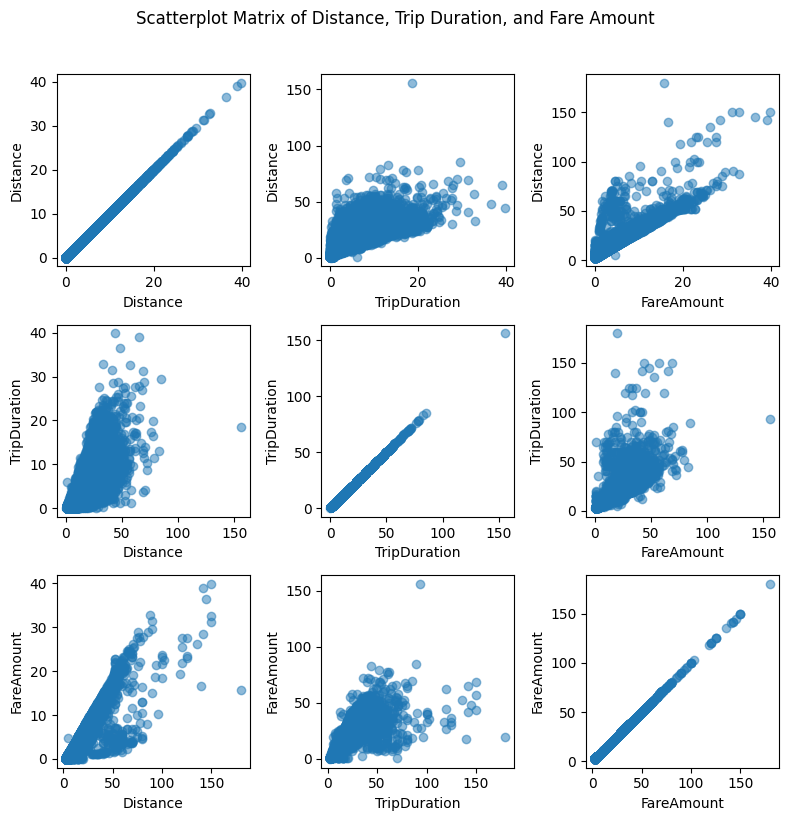

In [24]:
df_subset = df[['Distance', 'TripDuration', 'FareAmount']]

correlation_matrix = df_subset.corr()

print("Correlation Matrix:\n", correlation_matrix)

fig, axs = plt.subplots(3, 3, figsize=(8, 8))

columns = ['Distance', 'TripDuration', 'FareAmount']
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(df[columns[i]], df[columns[j]], alpha=0.5)
        axs[i, j].set_xlabel(columns[j])
        axs[i, j].set_ylabel(columns[i])

plt.suptitle('Scatterplot Matrix of Distance, Trip Duration, and Fare Amount', y=1.02)
plt.tight_layout()
plt.show()

The scatterplot matrix reveals strong positive correlations between Distance, Trip Duration, and Fare Amount. Distance and Fare Amount exhibit the strongest linear relationship, indicating that longer trips generally lead to higher fares. Distance and Trip Duration are also positively correlated, though with some variation, likely due to external factors such as traffic conditions. Trip Duration and Fare Amount show a positive trend but with more dispersion, suggesting that fare is influenced by more than just time. Overall, the patterns align with expectations, but some outliers may indicate unusual fare pricing or trip anomalies.


## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

Linear Regression Equation: FareAmount = 2.86 * Distance + 3.75
Predicted Fare for a 3-mile trip: $12.31


/Users/ethanmikel/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


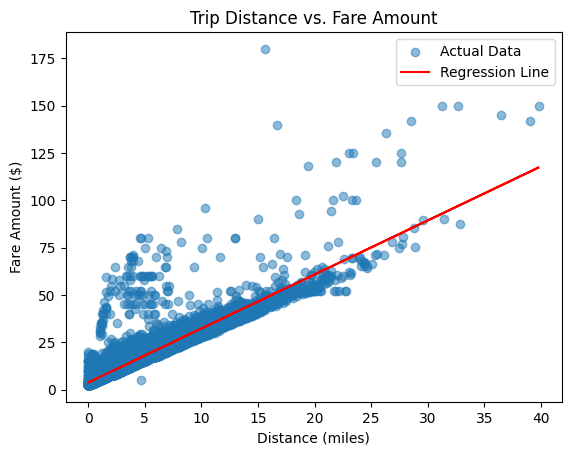

In [33]:
X = df[['Distance']]  # Independent variable (Trip Distance)
y = df['FareAmount']  # Dependent variable (Fare Amount)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: FareAmount = {slope:.2f} * Distance + {intercept:.2f}")

trip_distance = np.array([[3]])
predicted_fare = model.predict(trip_distance)[0]
print(f"Predicted Fare for a 3-mile trip: ${predicted_fare:.2f}")

plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount")
plt.legend()
plt.show()

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [35]:
X = df[['Distance', 'TripDuration']]  # Trip Distance & Travel Time
y = df['TotalAmount']  # Dependent Variable: Total Fare

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coef_distance = model.coef_[0]  # Coefficient for Distance
coef_time = model.coef_[1]  # Coefficient for Trip Duration
intercept = model.intercept_

print(f"Multiple Linear Regression Equation: \nTotalAmount = {coef_distance:.2f} * Distance + {coef_time:.2f} * TripDuration + {intercept:.2f}")

trip_features = np.array([[3, 6]])  # [Distance, Travel Time]
predicted_total = model.predict(trip_features)[0]

print(f"Predicted Total Amount for a 3-mile trip and 6-minute travel time: ${predicted_total:.2f}")

Multiple Linear Regression Equation: 
TotalAmount = 2.44 * Distance + 0.33 * TripDuration + 3.12
Predicted Total Amount for a 3-mile trip and 6-minute travel time: $12.39


/Users/ethanmikel/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

Optimized Regression Coefficients: Intercept = 0.50, Slope = 0.32
Linear Regression Equation: FareAmount = 0.50 + 0.32 * Distance


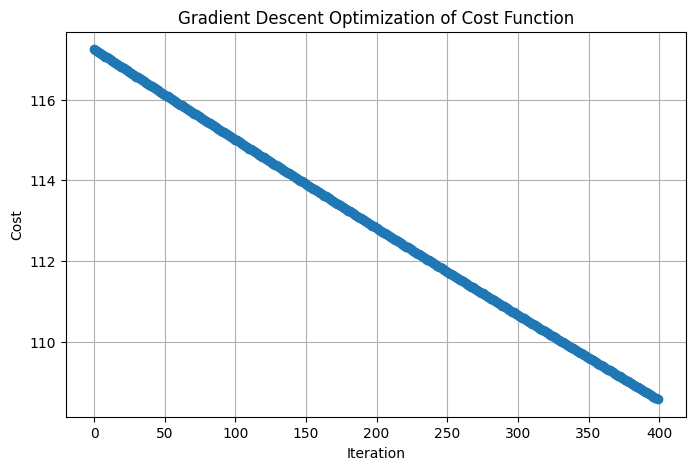

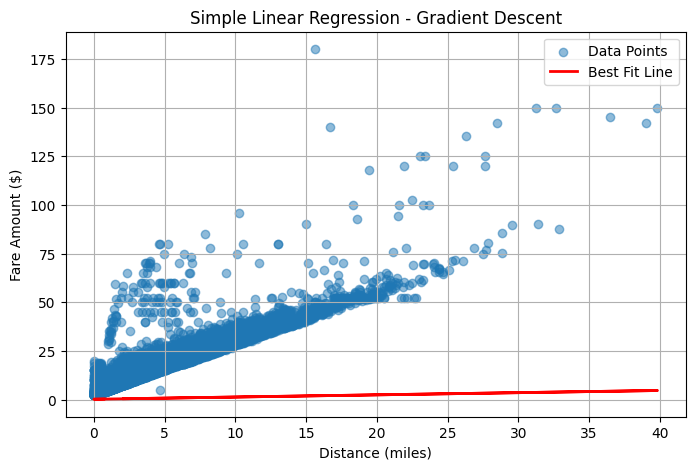

In [40]:
X = df['Distance'].values.reshape(-1, 1)  # Independent Variable (Distance)
y = df['FareAmount'].values  # Dependent Variable (Fare Amount)

X = (X - np.mean(X)) / np.std(X)

X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones

# Initialize parameters
theta = np.zeros(2) 
learning_rate = 0.0001
max_iterations = 400
precision = 0.0001

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

cost_history = []
m = len(y)

for i in range(max_iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    
    gradients = (1 / m) * X.T.dot(errors)
    
    theta -= learning_rate * gradients
    
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)
    
    if i > 0 and abs(cost_history[-2] - cost_history[-1]) < precision:
        print(f"Converged after {i+1} iterations.")
        break

intercept = theta[0]
slope = theta[1]

print(f"Optimized Regression Coefficients: Intercept = {intercept:.2f}, Slope = {slope:.2f}")
print(f"Linear Regression Equation: FareAmount = {intercept:.2f} + {slope:.2f} * Distance")

# Visualization of Cost Function
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Gradient Descent Optimization of Cost Function")
plt.grid()
plt.show()

# Visualization of Best Fit Line
plt.figure(figsize=(8, 5))
plt.scatter(df['Distance'], df['FareAmount'], alpha=0.5, label="Data Points")
plt.plot(df['Distance'], X.dot(theta), color='red', linewidth=2, label="Best Fit Line")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Simple Linear Regression - Gradient Descent")
plt.legend()
plt.grid()
plt.show()